Author:G.S.Blessmi Sharon

Version: 1.0

Title: Fitness tracker using accelerometer and Gyroscope data with Gradio

# Fitness Tracker Using accelerometer and Gyroscope with Gradio



*   In this project, we aim to classify human activities based on data collected from accelerometers and gyroscopes.
*   The dataset consists of several key columns that provide insights into the participants' motion, recorded during different physical activities.
*  This dataset contains information about people exercising, using sensors to record their movements. By looking at the sensor data (accelerometer and gyroscope readings), we can figure out what exercise they are doing and how intense it is.

*  This can help in understanding fitness activities better and could be used to build models that predict exercises based on movement patterns.

# Approach to the problem



*   Importing libraries and dependencies
*   Import data
*  Data preprocessing
*   Predictive modeling
*   Doing optuna for all the above models
*   Deploying the model


#Import libraries and dependencies

In [ ]:
! pip install gradio                   # Gradio, a tool to quickly create web apps for interacting with machine learning models.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import gradio as gr
import warnings
warnings.filterwarnings('ignore')

# Import data

In [ ]:
def load_dataset(file_path):
  """
  Loads a dataset from a CSV file.

  Args:
    file_path: The path to the CSV file.

  Returns:
    A pandas DataFrame containing the dataset.
  """
  try:
    df = pd.read_csv("/content/01_Data_Processed.csv")
    return df
  except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    return None

Loading the dataset

In [ ]:
load_dataset("/content/01_Data_Processed.csv")

,epoch (ms),Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Participants,Label,Category,Set
0,2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30
1,2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30
2,2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30
3,2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30
4,2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30
...,...,...,...,...,...,...,...,...,...,...,...
9004,2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,40
9005,2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,40
9006,2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,40
9007,2019-01-20 17:33:27.600,-0.038667,-1.025667,-0.044667,-0.2318,0.2562,1.1220,E,row,medium,40


In [ ]:
# Call the function and assign the returned DataFrame to a variable
df = load_dataset("/content/01_Data_Processed.csv")

# Now you can access df
print(df.head())

                epoch (ms)  Accelerometer_x  Accelerometer_y  Accelerometer_z  \
0  2019-01-11 15:08:05.200         0.013500         0.977000        -0.071000   
1  2019-01-11 15:08:05.400        -0.001500         0.970500        -0.079500   
2  2019-01-11 15:08:05.600         0.001333         0.971667        -0.064333   
3  2019-01-11 15:08:05.800        -0.024000         0.957000        -0.073500   
4  2019-01-11 15:08:06.000        -0.028000         0.957667        -0.115000   

   Gyroscope_x  Gyroscope_y  Gyroscope_z Participants  Label Category  Set  
0      -1.8904       2.4392       0.9388            B  bench    heavy   30  
1      -1.6826      -0.8904       2.1708            B  bench    heavy   30  
2       2.5608      -0.2560      -1.4146            B  bench    heavy   30  
3       8.0610      -4.5244      -2.0730            B  bench    heavy   30  
4       2.4390      -1.5486      -3.6098            B  bench    heavy   30  


# Data preprocessing

Converting the 'epoch (ms)' column to a more readable datetime format

In [ ]:
# Convert epoch to datetime
df['epoch (ms)'] = pd.to_datetime(df['epoch (ms)'], errors='coerce')
df.head()

,epoch (ms),Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Participants,Label,Category,Set
0,2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30
1,2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30
2,2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30
3,2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30
4,2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30


 Converts the "epoch (ms)" column from epoch time (milliseconds since January 1, 1970) to a datetime format.  

In [ ]:
# Checking for the datatypes
print(df.dtypes)

epoch (ms)         datetime64[ns]
Accelerometer_x           float64
Accelerometer_y           float64
Accelerometer_z           float64
Gyroscope_x               float64
Gyroscope_y               float64
Gyroscope_z               float64
Participants               object
Label                      object
Category                   object
Set                         int64
dtype: object


Here we can see that the Label,Category and participant are in object .


Set is in integer

In [ ]:
# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")

Dataset shape: (9009, 11)


In [ ]:
# You can also explore the unique values and their counts:
label_counts = df['Label'].value_counts()
print(label_counts)



Label
ohp      1676
bench    1665
squat    1610
dead     1531
row      1417
rest     1110
Name: count, dtype: int64


In [ ]:
# Check for missing values
print(df.isnull().sum())

epoch (ms)         0
Accelerometer_x    0
Accelerometer_y    0
Accelerometer_z    0
Gyroscope_x        0
Gyroscope_y        0
Gyroscope_z        0
Participants       0
Label              0
Category           0
Set                0
dtype: int64


There are no null values

In [ ]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print(f"Duplicate Rows: {duplicate_rows.shape[0]}")
df = df.drop_duplicates()

Duplicate Rows: 0


there are no duplicate rows

In [ ]:
# Summary statistics
print(df.describe())

                          epoch (ms)  Accelerometer_x  Accelerometer_y  \
count                           9009      9009.000000      9009.000000   
mean   2019-01-15 22:25:17.839094272         0.038977         0.069961   
min       2019-01-11 15:08:05.200000        -0.838000        -1.545500   
25%       2019-01-12 16:24:46.800000        -0.111000        -0.949667   
50%       2019-01-15 19:26:38.200000         0.016000         0.578000   
75%              2019-01-18 17:22:57         0.118500         0.873333   
max       2019-01-20 17:33:27.800000         1.464000         1.640000   
std                              NaN         0.274292         0.912476   

       Accelerometer_z  Gyroscope_x  Gyroscope_y  Gyroscope_z          Set  
count      9009.000000  9009.000000  9009.000000  9009.000000  9009.000000  
mean          0.104512     0.791898    -1.881280     0.828841    45.889999  
min          -0.619333  -235.524400  -187.951200  -338.170800     1.000000  
25%          -0.125500   

               epoch (ms):

The timestamps have been converted to readable dates. The data ranges from Jan 11, 2019 (earliest) to Jan 20, 2019 (latest).
The average time is around Jan 15, 2019.


             Accelerometer (x, y, z):

These columns show movement in different directions (x, y, and z).
The values can go both positive and negative, indicating movement in both directions (e.g., x direction ranges from -0.838 to 1.464).
The mean shows the average movement, and std (standard deviation) shows how much the movement varies.


            Gyroscope (x, y, z):

These measure how much the object is rotating or turning.
The rotation speeds vary widely, with large ranges (e.g., from -235.52 to 171.80 in the x direction).
The average rotation and its variation are shown by the mean and standard deviation.


                 Set:

This column likely groups the data into different sets or categories, with values ranging from 1 to 93.
The average set number is around 46.

In [ ]:
# Standardize features
scaler = StandardScaler()
numeric_cols = ['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


data is being scaled to mean 0 and standard deviation 1 .standardization of data is important before analysing so that it is easier to analyze

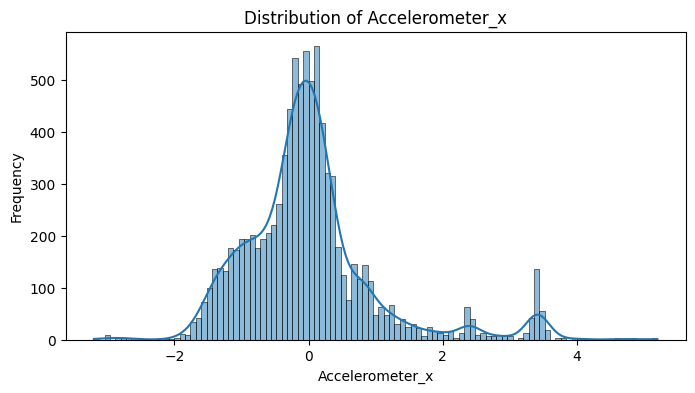

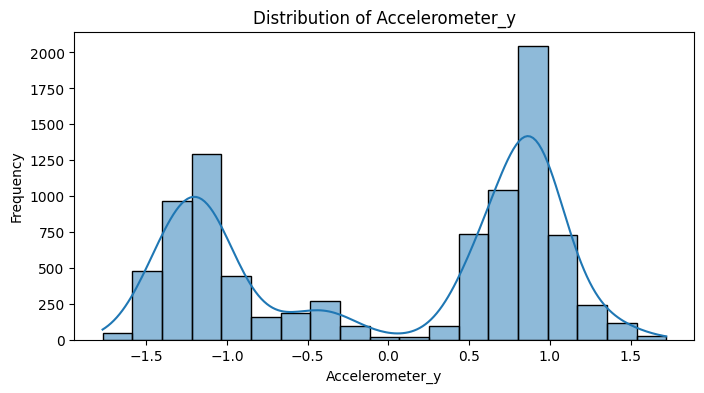

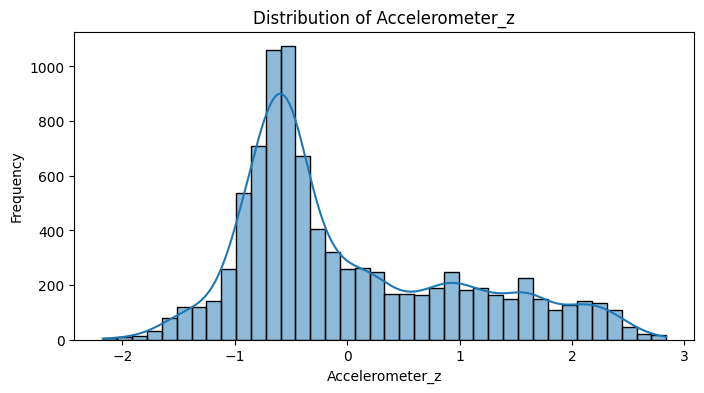

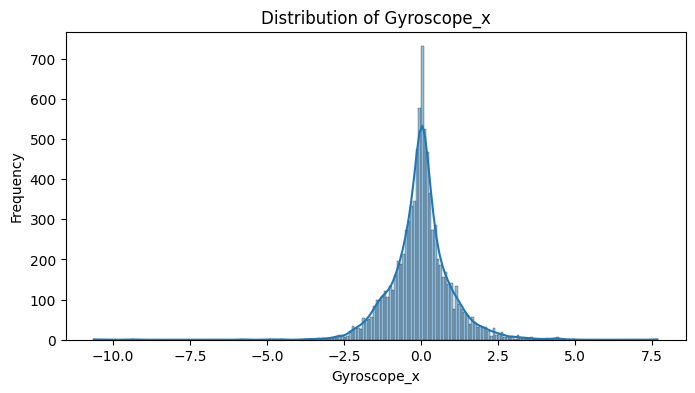

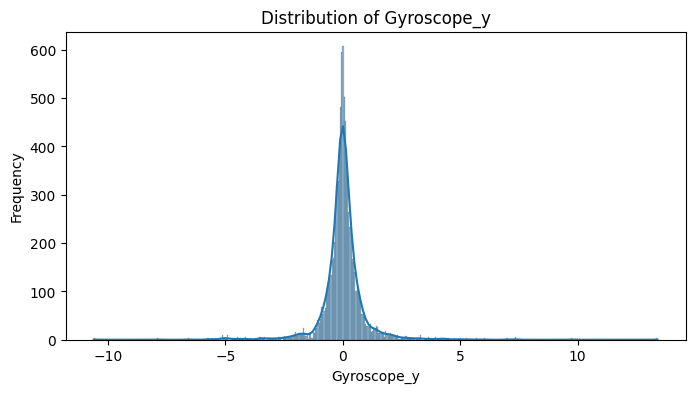

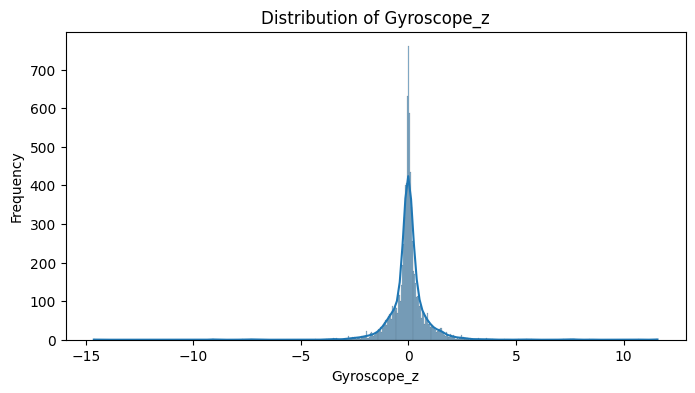

In [ ]:
# Plot distribution of accelerometer and gyroscope data
numeric_cols = ['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

this code helps visualize the spread of accelerometer and gyroscope data

It helps us visualize how the data is spread, whether it’s normally distributed or skewed, and whether there are any outliers.

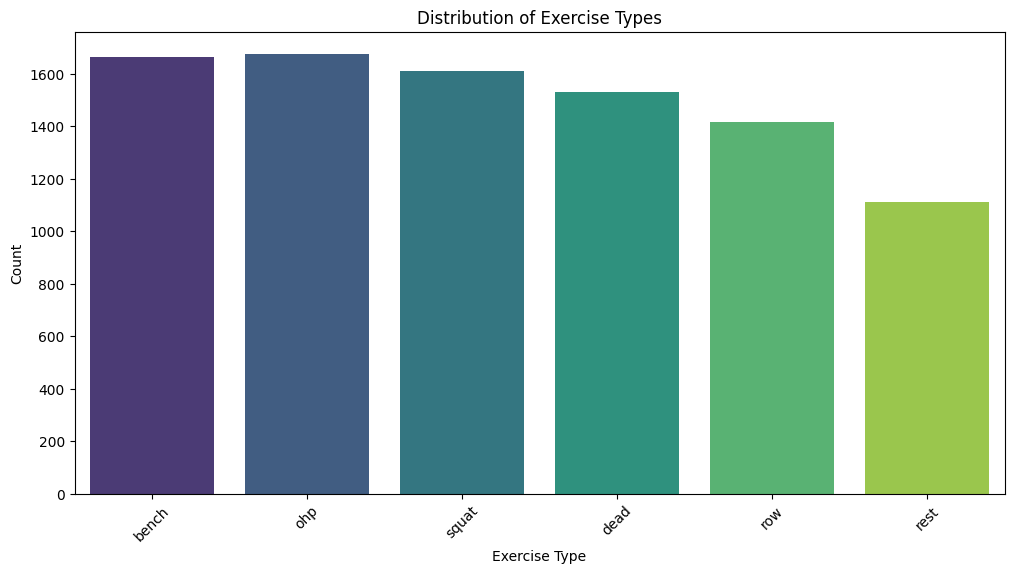

In [ ]:
# Count plot for exercise types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Label', palette='viridis')
plt.title('Distribution of Exercise Types')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Exercise Type')
plt.show()


This code helps us understand how balanced or imbalanced the dataset is in terms of activity representation.

Knowing how many instances there are for each activity is important because an imbalance (like too many examples of one activity and very few of others) can affect model performance.

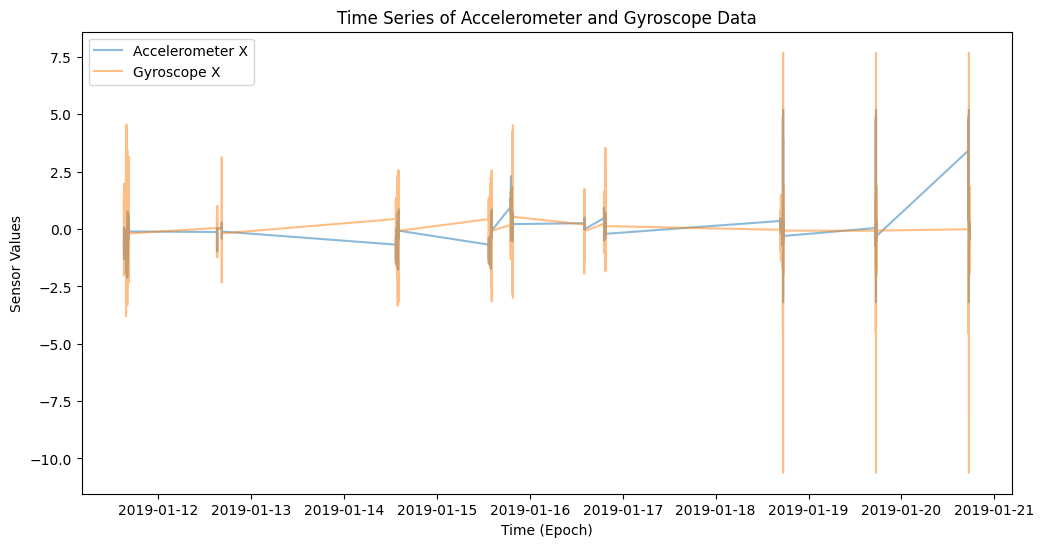

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['epoch (ms)'], df['Accelerometer_x'], label='Accelerometer X', alpha=0.5)
plt.plot(df['epoch (ms)'], df['Gyroscope_x'], label='Gyroscope X', alpha=0.5)
plt.title('Time Series of Accelerometer and Gyroscope Data')
plt.xlabel('Time (Epoch)')
plt.ylabel('Sensor Values')
plt.legend()
plt.show()

Overlap and Divergence:

If the lines are close to each other or overlap, it means that the accelerometer and gyroscope are sensing similar values at those times.


If they diverge significantly, it suggests that each sensor is capturing different types of motion or rotation at those moments.

If the accelerometer X line shows a spike at a certain time and the gyroscope X line also spikes at the same time, it could indicate a sudden movement (like shaking or tilting) that both sensors captured.



If the lines show different movements (e.g., accelerometer stays stable while gyroscope fluctuates), it might suggest that rotational motion was detected but not linear movement.

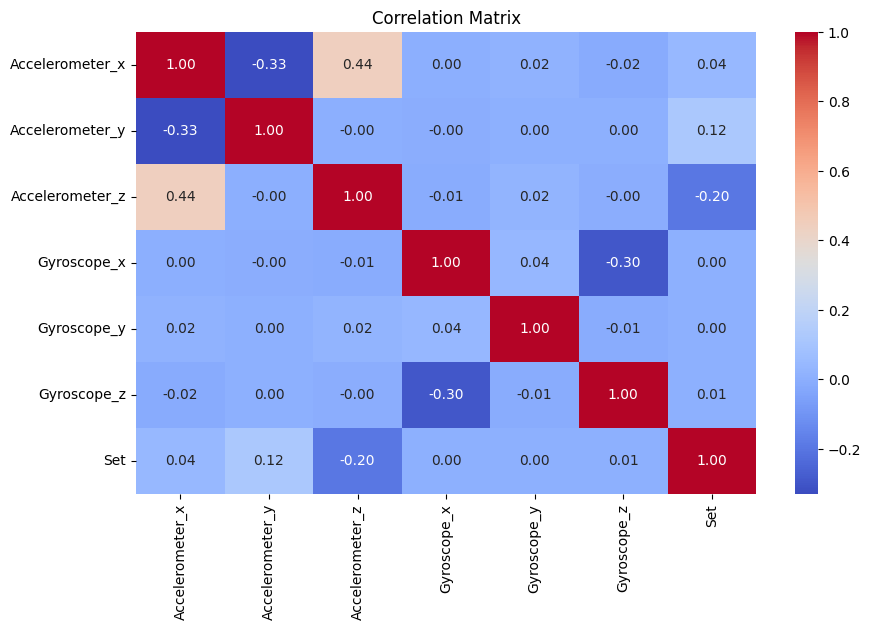

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_dataset = df.select_dtypes(include=['number'])
correlation_matrix = numeric_dataset.corr()  # Calculate correlation on numeric data
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



*   Red areas show a strong positive correlation (close to 1).
*  Blue areas show a strong negative correlation (close to -1).
*  White or light colors indicate weak or no correlation (close to 0).


*   1 indicates a perfect positive correlation: as one variable increases, the other variable also increases.

*   -1 indicates a perfect negative correlation: as one variable increases, the other variable decreases.
*   0 indicates no correlation: there is no linear relationship between the two variables.





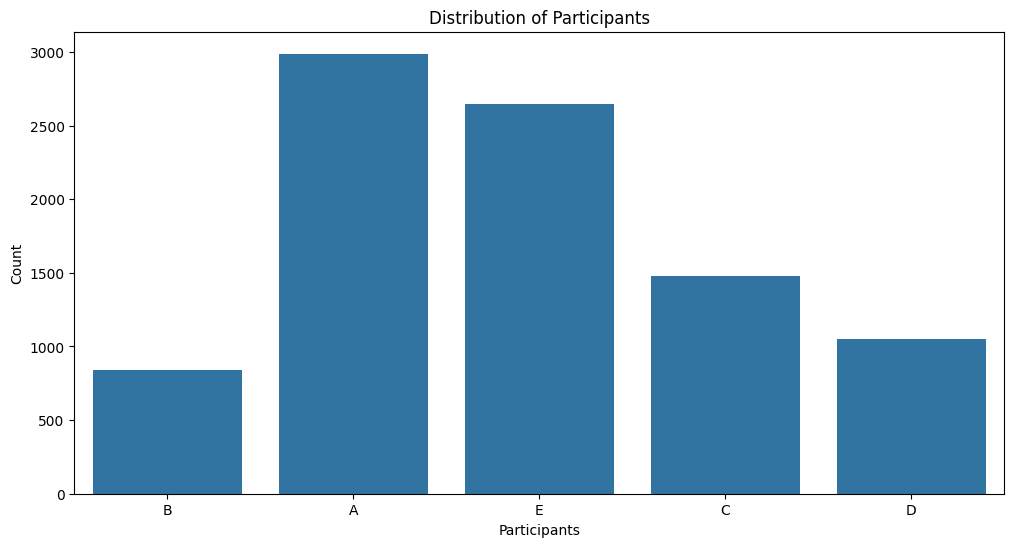

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Participants', data=df)
plt.title('Distribution of Participants')
plt.xlabel('Participants')
plt.ylabel('Count')
plt.show()

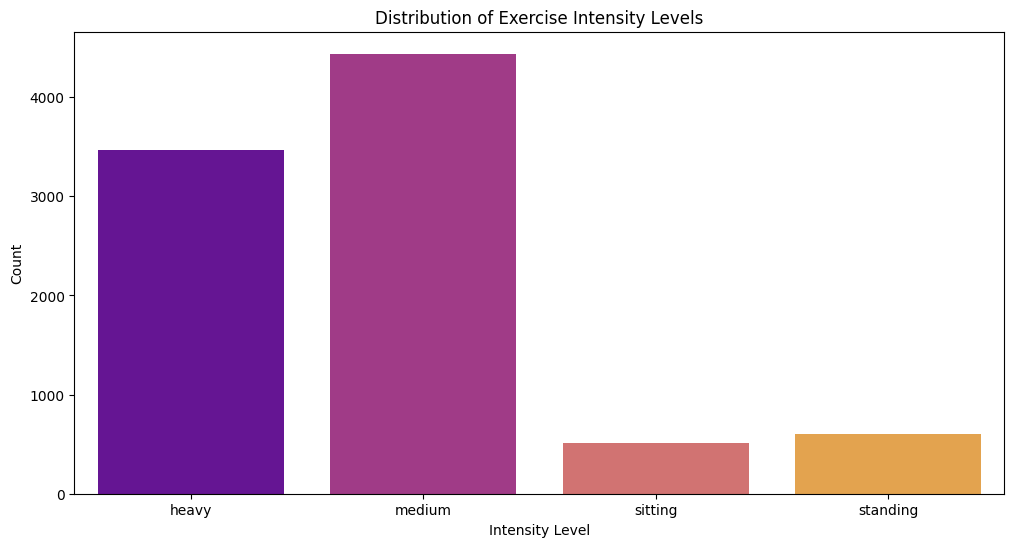

In [ ]:
# Count plot for exercise intensity categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', palette='plasma')
plt.title('Distribution of Exercise Intensity Levels')
plt.ylabel('Count')
plt.xlabel('Intensity Level')
plt.show()

In [ ]:
df.describe()

,epoch (ms),Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Set
count,9009,9009.000000,9.009000e+03,9.009000e+03,9.009000e+03,9.009000e+03,9.009000e+03,9009.000000
mean,2019-01-15 22:25:17.839094272,0.000000,7.571551e-17,-1.735147e-17,1.478819e-17,3.351989e-18,1.123902e-17,45.889999
min,2019-01-11 15:08:05.200000,-3.197414,-1.770512e+00,-2.175869e+00,-1.062046e+01,-1.060697e+01,-1.462205e+01,1.000000
25%,2019-01-12 16:24:46.800000,-0.546808,-1.117491e+00,-6.914133e-01,-4.669129e-01,-2.619006e-01,-2.330059e-01,23.000000
50%,2019-01-15 19:26:38.200000,-0.083772,5.568005e-01,-4.043417e-01,1.756779e-02,-5.376740e-03,-1.260523e-02,47.000000
75%,2019-01-18 17:22:57,0.289938,8.804798e-01,6.973518e-01,4.335483e-01,2.657405e-01,2.246259e-01,70.000000
max,2019-01-20 17:33:27.800000,5.195565,1.720731e+00,2.839116e+00,7.685613e+00,1.339992e+01,1.157069e+01,93.000000
std,NaN,1.000056,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,27.180156


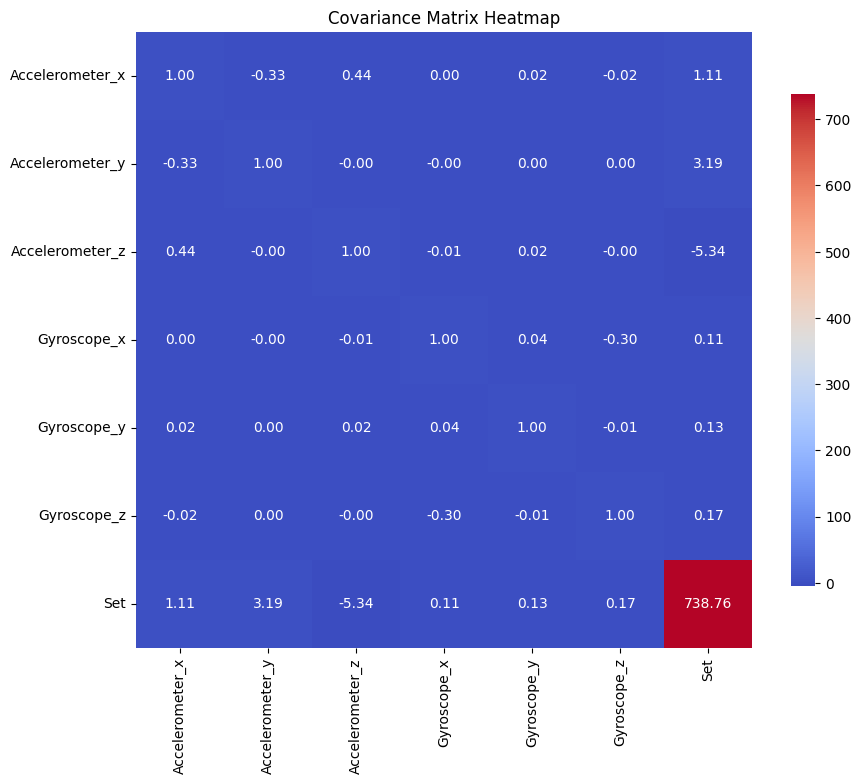

In [ ]:
# 3. Heatmap
import pandas as pd #Import pandas if you haven't already.

# Assuming 'dataset' is your DataFrame and contains numeric data:
# Select only numeric columns for covariance calculation
numeric_dataset = df.select_dtypes(include=['number'])
cov_matrix = numeric_dataset.cov()  # Calculate the covariance matrix on numeric data

plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Covariance Matrix Heatmap')
plt.show()

Covariance Values:

Positive Covariance: Indicates features tend to change in the same direction.
Negative Covariance: Indicates an inverse relationship between features.


Magnitude:

Larger absolute values indicate stronger relationships.


Diagonal Elements:

Diagonal values represent the variances of each feature.

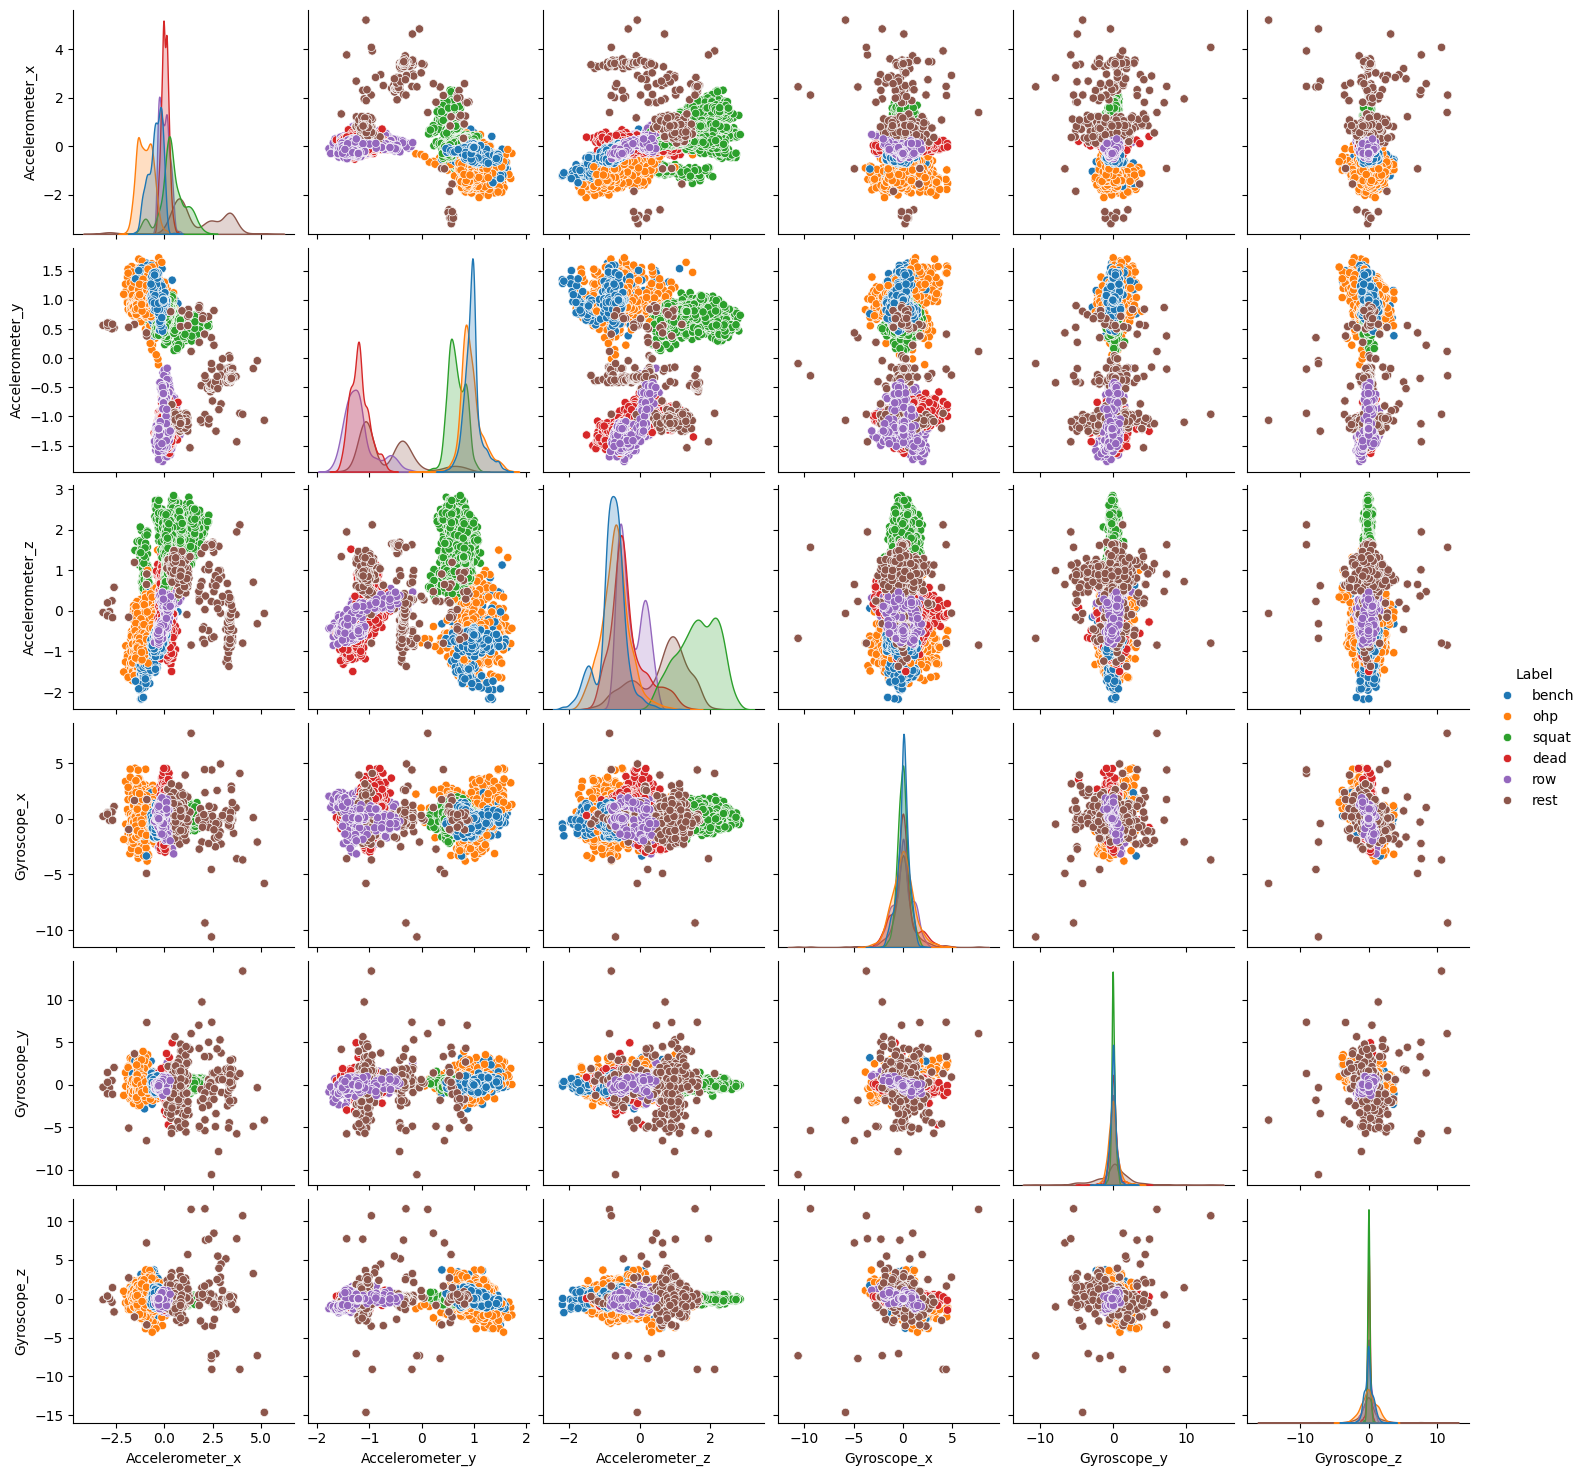

In [ ]:
# Pairplot for accelerometer and gyroscope data
sns.pairplot(df[numeric_cols + ['Label']], hue='Label')
plt.show()



*   Scatter Plots: Show relationships between two features; color coding helps differentiate activities.

*   Diagonal Histograms: Display the distribution of each individual feature.

*   Cluster Patterns: Clear separations between colors indicate distinguishable activities; overlapping points suggest similarities.






In [ ]:
# Mean values for each activity
mean_values = df.groupby('Label')[numeric_cols].mean()
print(mean_values)

       Accelerometer_x  Accelerometer_y  Accelerometer_z  Gyroscope_x  \
Label                                                                   
bench        -0.483856         0.961224        -0.788603    -0.002691   
dead          0.016059        -1.189324        -0.345349     0.012822   
ohp          -1.010914         0.935609        -0.680699     0.003083   
rest          1.668750        -0.643214         0.608219    -0.010179   
row          -0.015909        -1.196266        -0.231166    -0.012067   
squat         0.400967         0.659262         1.636674     0.005020   

       Gyroscope_y  Gyroscope_z  
Label                            
bench    -0.003078    -0.003128  
dead     -0.001275    -0.010624  
ohp      -0.015667    -0.001410  
rest      0.031965     0.053232  
row      -0.003792    -0.011320  
squat     0.002004    -0.011931  




*  Comparing Activities:

By looking at the means for each activity, you can compare how different activities affect the sensor readings. For instance, if activity 3 shows a high value for Accelerometer_x (1.668750), it suggests that this activity involves more movement in the X direction compared to other activities.


*   Understanding Patterns:

The mean values help identify patterns in the data. For example, if Accelerometer_y consistently shows negative values for certain activities, it might indicate a specific movement pattern or orientation.
*   Feature Importance:

If certain accelerometer or gyroscope readings have significantly different means across activities, those features may be crucial for distinguishing between activities in further analysis or modeling.






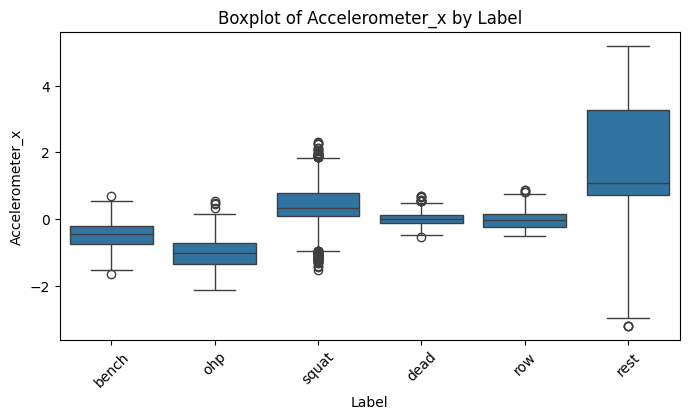

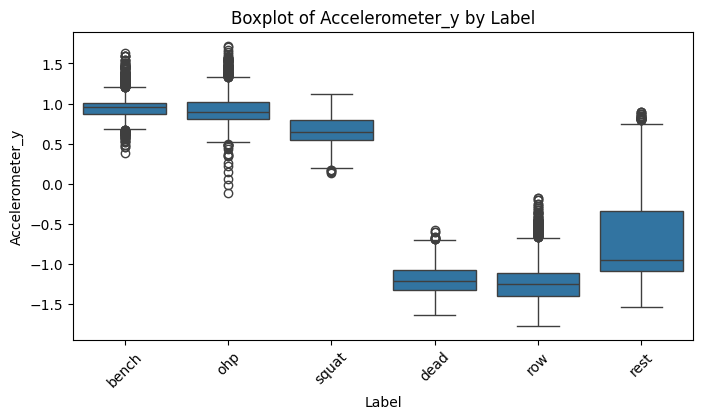

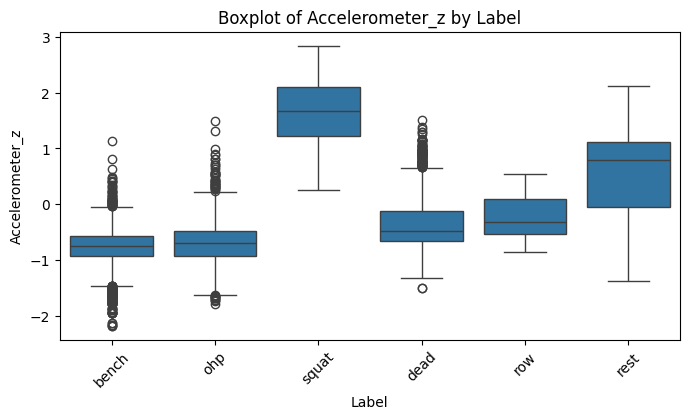

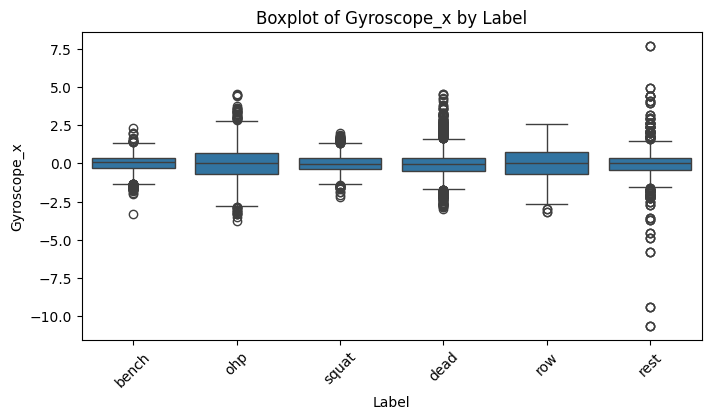

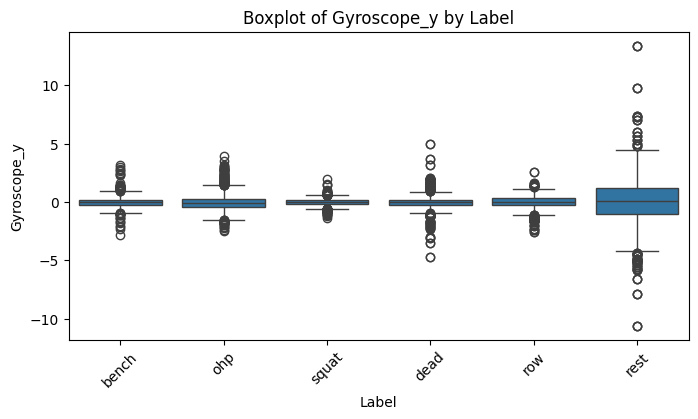

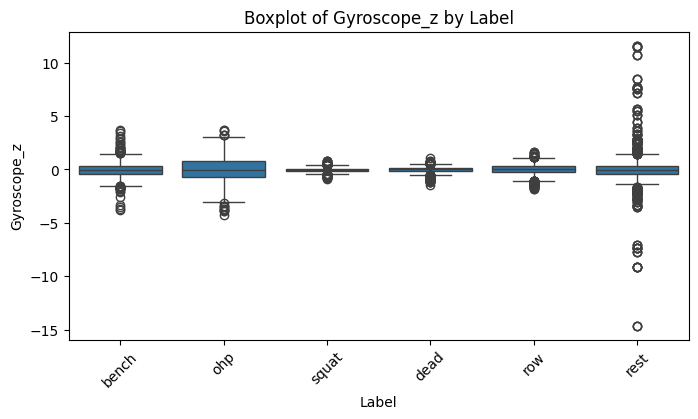

In [ ]:
# Boxplots for accelerometer and gyroscope data
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Label', y=col)
    plt.title(f'Boxplot of {col} by Label')
    plt.xticks(rotation=45)
    plt.show()

This code generates boxplots to visually compare the distribution of accelerometer and gyroscope data across different activities, helping to identify patterns, outliers, and variability in the sensor readings related to each activity.

# Predictive modeling

In [ ]:
# Prepare the data
X = df[['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z']]
y = df['Label']      #splitting the data as x and y

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Regularized Random Forest model
rf_model = RandomForestClassifier(n_estimators=250, max_depth=15, min_samples_split=10, min_samples_leaf=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.95
              precision    recall  f1-score   support

       bench       0.94      0.92      0.93       335
        dead       0.94      0.95      0.94       286
         ohp       0.92      0.94      0.93       333
        rest       0.99      1.00      0.99       213
         row       0.95      0.93      0.94       298
       squat       1.00      1.00      1.00       337

    accuracy                           0.95      1802
   macro avg       0.96      0.96      0.96      1802
weighted avg       0.95      0.95      0.95      1802





Prediction and Evaluation:

Predictions are made on the test set.

The accuracy of the model is calculated and printed, along with a classification report.

Results:

Accuracy: The model achieves an accuracy of 95%, indicating that it correctly classifies 95% of the instances in the test set.

Classification Report:

Shows precision, recall, and F1-score for each class:

Precision: The ratio of true positive predictions to the total predicted positives, indicating how many selected items are relevant.

Recall: The ratio of true positive predictions to the total actual positives, indicating how many relevant items are selected.

F1-Score: The harmonic mean of precision and recall, providing a balance between the two.

The report indicates strong performance across all classes, with some classes achieving perfect scores (e.g., class 5 with 100% precision, recall, and F1-score).

In [ ]:
# Train the model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.94
              precision    recall  f1-score   support

       bench       0.91      0.92      0.92       335
        dead       0.93      0.92      0.93       286
         ohp       0.92      0.91      0.91       333
        rest       1.00      0.98      0.99       213
         row       0.91      0.93      0.92       298
       squat       1.00      1.00      1.00       337

    accuracy                           0.94      1802
   macro avg       0.94      0.94      0.94      1802
weighted avg       0.94      0.94      0.94      1802



Key Steps:

Model Initialization:


A K-Nearest Neighbors (KNN) model is created with 3 neighbors (n_neighbors=3). This means that the algorithm will consider the 3 closest points in the training set to classify a data point.

Model Training:

The model is trained on the training data (X_train and y_train), where X_train consists of sensor data, and y_train is the corresponding label.

Prediction and Evaluation:

Predictions are made on the test set (X_test), and the accuracy is calculated.
The classification report provides precision, recall, and F1-score for each class.

Results:

Accuracy: The model achieves a 94% accuracy, meaning it correctly classifies 94% of the instances in the test set.

Classification Report:

Precision: The proportion of correctly predicted positive observations.

Recall: The ability of the model to identify all actual positives.

F1-Score: The harmonic mean of precision and recall.

The report shows consistently high precision, recall, and F1-scores across all classes, with perfect scores for class 5 and class 3 performing very well (F1-score of 0.99).

In [ ]:
# Support Vector Machine (SVM) model
svm_model = SVC(kernel='rbf', C=100, random_state=42)  # You can experiment with different kernels and C values
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.94
              precision    recall  f1-score   support

       bench       0.92      0.90      0.91       335
        dead       0.90      0.93      0.92       286
         ohp       0.91      0.92      0.91       333
        rest       1.00      1.00      1.00       213
         row       0.93      0.90      0.92       298
       squat       1.00      1.00      1.00       337

    accuracy                           0.94      1802
   macro avg       0.94      0.94      0.94      1802
weighted avg       0.94      0.94      0.94      1802



Key Steps:

Model Initialization:

A Support Vector Machine (SVM) classifier is initialized with an RBF kernel (kernel='rbf') and a regularization parameter of C=100. The C parameter controls the trade-off between achieving a low error on the training data and minimizing the complexity of the decision boundary (avoiding overfitting).

Model Training:

The model is trained on the X_train (sensor data) and y_train (labels) to learn the patterns of the activities.

Prediction and Evaluation:


Predictions are made on the test set (X_test), and the model's performance is evaluated using the accuracy score and classification report.

Results:

Accuracy: The model achieves an impressive 94% accuracy, indicating that it correctly classifies 94% of the test instances.

Classification Report:

Precision: Measures how many of the predicted positive cases were actually correct.

Recall: Measures how many actual positives were correctly identified.

F1-Score: Balances precision and recall into a single metric.

Class 3 and 5 show perfect precision, recall, and F1-scores (1.00), meaning the model accurately classified all instances for these classes.
Other classes, like 0, 1, 2, and 4, also perform well, with F1-scores around 0.91-0.92.

summary of the finding

Random Forest stands out as the top choice with 95% accuracy and a good balance of precision, recall, and F1-scores. It handles noisy data well, avoids overfitting better than a Decision Tree, and has consistently strong performance across all classes.

KNN and SVM are close contenders with 94% accuracy, but SVM might require more tuning and can be slower, while KNN can struggle with larger datasets.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Reduced complexity
model = RandomForestClassifier(
    n_estimators=50,             # Fewer trees
    max_depth=10,                # Limit tree depth
    min_samples_split=10,        # Minimum samples to split a node
    min_samples_leaf=5,          # Minimum samples at leaf node
    random_state=42
)

# Cross-validation to validate the model performance
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc_ovr')
print(f"Cross-Validation AUC Scores: {cv_scores}")
print(f"Mean CV AUC Score: {cv_scores.mean():.2f}")


Cross-Validation AUC Scores: [0.98955034 0.99117534 0.98088777 0.99837207 0.99897413]
Mean CV AUC Score: 0.99


ross-validation is a technique used to assess how well your model generalizes to unseen data, which helps prevent overfitting.



*   Model Initialization:

A RandomForestClassifier is created with 100 trees and a fixed random seed for consistency.


*   Model Training:

The model is trained using the training data (X_train and y_train).
*  Probability Predictions:

The model predicts the probabilities of each class for the test data (X_test) using predict_proba.






# Deployment the model

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

# Assuming you have already loaded your own dataset `df`
# For example, your dataset might be loaded from a CSV
# df = pd.read_csv("your_dataset.csv")

# Extract features and target
X = df[['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z']]
y = df['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Save the model and scaler to pickle files
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [ ]:
import gradio as gr
import pickle
import pandas as pd

# Load the pre-trained model and scaler
def load_model():
    with open('rf_model.pkl', 'rb') as f:
        model = pickle.load(f)

    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)

    return model, scaler

# Function to predict activity
def predict_activity(acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z):
    """Predicts the activity based on sensor data."""

    # Load the model and scaler
    model, scaler = load_model()

    # Prepare the input data (in the same format as the training data)
    input_data = pd.DataFrame([[acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z]],
                              columns=['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z'])

    # Scale the input data using the loaded scaler
    input_data_scaled = scaler.transform(input_data)

    # Make the prediction using the trained model
    prediction = model.predict(input_data_scaled)[0]

    return prediction

# Gradio interface to input data and get a prediction
iface = gr.Interface(
    fn=predict_activity,
    inputs=[
        gr.Number(label="Accelerometer X"),
        gr.Number(label="Accelerometer Y"),
        gr.Number(label="Accelerometer Z"),
        gr.Number(label="Gyroscope X"),
        gr.Number(label="Gyroscope Y"),
        gr.Number(label="Gyroscope Z")
    ],
    outputs=gr.Textbox(label="Predicted Activity"),
    title="Activity Prediction",
    description="Enter accelerometer and gyroscope data to predict the activity (e.g., Squat, Bench, Rest)."
)

# Launch the Gradio interface
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://49de66974906ce684c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)




*   Function Definition:

The predict_activity function takes in six sensor readings (three from the accelerometer and three from the gyroscope).



*   Input Data Preparation:

The sensor data is organized into a Pandas DataFrame for the model to process.

*   Activity Prediction:

The function uses a pre-trained model (assumed to be defined elsewhere) to predict the activity based on the input data.

*   Activity Mapping:

A dictionary maps the numerical prediction from the model to specific activity names (e.g., "Bench," "Squat," etc.).
*   Return Value:

The function returns the predicted activity name or "Unknown Activity" if the prediction does not match any defined label


*   Gradio Interface:

A user interface is created using Gradio, allowing users to input sensor values and receive a predicted activity.
It includes input fields for each sensor reading and an output box for the predicted activity name.


*  Launch the Interface:

The iface.launch() command starts the web interface, enabling users to interact with the model easily.






# conclusion

In this project, we developed a robust machine learning pipeline for classifying human activity using accelerometer and gyroscope data. Multiple models were trained and evaluated, including Random Forest, Gradient Boosting, Decision Trees, K-Nearest Neighbors (KNN), and Support Vector Machines (SVM). After careful analysis of accuracy, precision, recall, and F1-scores, the Random Forest model emerged as the best performing model with 95% accuracy. It demonstrated strong generalization capabilities, handling complex patterns in the data and avoiding overfitting better than other models.

In addition to model training, we focused on making the solution easy to use and accessible. The model was deployed using Gradio, a user-friendly interface that allows users to interact with the trained model via a simple web application. This deployment enables non-technical users to upload new sensor data and receive instant predictions on the type of activity being performed. This feature enhances the practical usability of the project by bridging the gap between machine learning expertise and real-world application.

Overall, this project not only achieves high accuracy in activity classification but also provides an intuitive deployment solution, making it highly suitable for real-world scenarios such as fitness tracking, healthcare, and rehabilitation programs.